This notebook compiles all of the intensity measurements into a latex table.

In [1]:
# IMPORT PACKAGES

#global
import numpy as np
from matplotlib import pyplot as plt
import astropy
import astropy.io.fits as pyfits
from astropy.table import Table, join
from astropy.wcs import WCS
from astropy.io import ascii
from astropy.io import fits
import os


In [2]:
# import intensity measurements data
# import SNeCO data

dataFile = '../Data/3.SNe+GalData.csv'
SNe_Gal_Data = Table.read(dataFile, format='csv') 

dataFile = '../Data/3.IntenData.csv'
IntenTable = Table.read(dataFile, format='csv') 

dataTable = join(SNe_Gal_Data, IntenTable, keys=('galaxy', 'SN_name'))


In [3]:
dataTable[0:1]

galaxy,SN_name,SN_type,SN_ra,SN_dec,SN_xCoord,SN_yCoord,SN_co21int,SN_co21err,SN_co21ew,map_beamsize,orient_ra,orient_dec,dist,orient_posang,orient_incl,size_r25,telOrient,ImageFile150,ErrFile150,AlphaCOFile,PACovFile,IFRFile,MixedMaps,IFRResizedMaps,MassMaps,NatRes,NatInt,pc60Int,pc90Int,pc120Int,pc150Int,pc500Int,pc750Int,pc1000Int,NatErr,pc60Err,pc90Err,pc120Err,pc150Err,pc500Err,pc750Err,pc1000Err,NatEW,pc60EW,pc90EW,pc120EW,pc150EW,pc500EW,pc750EW,pc1000EW,NatSNR,pc60SNR,pc90SNR,pc120SNR,pc150SNR,pc500SNR,pc750SNR,pc1000SNR,alphaCO,pc60mgsd,pc90mgsd,pc120mgsd,pc150mgsd,pc500mgsd,pc750mgsd,pc1000mgsd,pc60mgsdErr,pc90mgsdErr,pc120mgsdErr,pc150mgsdErr,pc500mgsdErr,pc750mgsdErr,pc1000mgsdErr
str8,str11,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str9,str112,str113,str80,str112,str97,str37,str54,str35,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
circinus,SN1996cr,II,213.2918,-65.3457,86.56761411031889,84.63433198287285,186.84804,2.137819,34.56537,0.002032163908078,213.29124,-65.33915,4.2,36.74,64.3,262.49515,7m+tp,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_mom0.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_emom0.fits,/data/kant/0/sun.1608/PHANGS/ALMA/alphaCO/v1p0/ESO097-013_alphaCO21_scaling.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_coverage2d.fits,/data/tycho/0/leroy.42/projects/phangs_survey_2019/working_data/z0mgs/eso097-013_w1_gauss7p5.fits,../Data/MixedMaps/circinus_Mixed.fits,../Data/ReprojectedInfraredMaps/circinus_reshaped.fits,../Data/MassMaps/circinus_Mass.fits,148.96539476404914,186.84803771972656,nan,nan,nan,186.84803771972656,111.39796447753906,97.68943786621094,81.1122817993164,2.1378190517425537,nan,nan,nan,2.1378190517425537,0.24664470553398132,0.17664189636707306,0.16147032380104065,34.56536865234375,nan,nan,nan,34.56536865234375,49.76144790649414,69.42247772216797,86.25480651855469,87.40124079604642,nan,nan,nan,87.40124079604642,451.65358095307374,553.036623107839,502.3355368956884,4.968773833170559,nan,nan,nan,402.6115402289611,240.03519974851744,210.4966984047925,174.77700651956354,nan,nan,nan,4.606473964923083,0.5314586441272052,0.3806198172227499,0.34792881188466773


In [4]:
# pull galaxy names and telescope orientation to generate the file lists

galaxies  = dataTable['galaxy']
SNname    = dataTable['SN_name']
SNtype    = dataTable['SN_type']
pc60Int   = dataTable['pc60Int']
pc90Int   = dataTable['pc90Int']
pc120Int  = dataTable['pc120Int']
pc150Int  = dataTable['pc150Int']
pc60Err   = dataTable['pc60Err']
pc90Err   = dataTable['pc90Err']
pc120Err  = dataTable['pc120Err']
pc150Err  = dataTable['pc150Err']

In [5]:
def makeIntStr(intVal, errVal):
    
    string = str(round(intVal,2)) + " $\pm$ " + str(round(errVal,2))
    
    return(string)

Arr60, Arr90, Arr120, Arr150 = [],[],[],[]

for i in range(len(galaxies)):
    
    if(np.isfinite(pc60Int[i])==True):
        string = makeIntStr(pc60Int[i], pc60Err[i])
        Arr60.append(string)
    else:
        Arr60.append("nan")
        
    if(np.isfinite(pc90Int[i])==True):
        string = makeIntStr(pc90Int[i], pc90Err[i])
        Arr90.append(string)
    else:
        Arr90.append("nan")
        
    if(np.isfinite(pc120Int[i])==True):
        string = makeIntStr(pc120Int[i], pc120Err[i])
        Arr120.append(string)
    else:
        Arr120.append("nan")
        
    if(np.isfinite(pc150Int[i])==True):
        string = makeIntStr(pc150Int[i], pc150Err[i])
        Arr150.append(string)
    else:
        Arr150.append("nan")
        
print(Arr60)

['nan', 'nan', '4.94 $\\pm$ 1.73', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', '3.04 $\\pm$ 0.64', '62.43 $\\pm$ 0.73', '38.5 $\\pm$ 0.58', '164.3 $\\pm$ 0.96', '2.35 $\\pm$ 0.67', 'nan', '7.42 $\\pm$ 1.46', 'nan']


In [6]:
intenTexTable = Table({"Supernova"  :  SNname,
                       "Type"       :  SNtype,
                       "Galaxy"     :  galaxies,
                       "60pc"       :  Arr60,
                       "90pc"       :  Arr90,
                       "120pc"      :  Arr120,
                       "150pc"      :  Arr150
                      })

In [7]:
ascii.write(intenTexTable, '../Data/3.IntenTexTable.tex', format='latex', fast_writer=False, overwrite=True)  

In [8]:
# for i in range(len(galaxies)):
#     print(Arr150[i], galaxies[i])


def logErrors(value, error):
    logErr = 0.434*(np.log10(value-error)- np.log10(value+error))
    return(logErr)

In [27]:
x60v150, y60v150, ex60v150, ey60v150 = [],[],[],[]
x90v150, y90v150, ex90v150, ey90v150 = [],[],[],[]
x120v150, y120v150, ex120v150, ey120v150 = [],[],[],[]

#get intensity v intensity arrays
for i in range(len(SNname)):
    if (np.isfinite(pc60Int[i])and np.isfinite(pc150Int[i])):
        y60v150.append(pc60Int[i])
        x60v150.append(pc150Int[i])
        ey60v150.append(pc60Err[i])
        ex60v150.append(pc150Err[i])
    if (np.isfinite(pc90Int[i])and np.isfinite(pc150Int[i])):
        y90v150.append(pc90Int[i])
        x90v150.append(pc150Int[i])
        ey90v150.append(pc90Err[i])
        ex90v150.append(pc150Err[i])
    if (np.isfinite(pc120Int[i])and np.isfinite(pc150Int[i])):
        y120v150.append(pc120Int[i])
        x120v150.append(pc150Int[i])
        ey120v150.append(pc120Err[i])
        ex120v150.append(pc150Err[i])
    
#next assign upper limit arrows and error bars
def checkULs(xvarray, yvarray, exarray, eyarray):

    detx = np.asarray(xvarray) < (3 * np.asarray(exarray))
    dety = np.asarray(yvarray) < (3 * np.asarray(eyarray))
    
    for i in range(len(detx)):
        if detx[i] == True:
            xvarray[i] = 3 * exarray[i]
        if dety[i] == True:
            yvarray[i] = 3 * eyarray[i]
    
    return(detx,dety, xvarray, yvarray)

Det60x,Det60y,x60v150Flip, y60v150Flip = checkULs(x60v150, y60v150, ex60v150, ey60v150)
Det90x,Det90y,x90v150Flip, y90v150Flip = checkULs(x90v150, y90v150, ex90v150, ey90v150)
Det120x,Det120y,x120v150Flip, y120v150Flip = checkULs(x120v150, y120v150, ex120v150, ey120v150)

# if x is upper limit, det60x is true, etc.
# x60v150, y60v150 x is 150 value and y is 60 value, etc
# xerr=ex120v150, yerr=ey120v150

def reorder(detArrx, detArry, xArr, yArr, xerr, yerr):
    
    xD, yD, xDe, yDe, xULD, yULD, xULDe, yULDe, xDUL, yDUL, xDULe, yDULe,xULS, yULS, xULSe, yULSe = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
    logxDe, logyDe, logxULDe, logyULDe, logxDULe, logyDULe, logxULSe, logyULSe = [],[],[],[],[],[],[],[]
    for i in range(len(detArrx)):
        
        if detArrx[i] == False and detArry[i] == False:
            xD.append(xArr[i])
            yD.append(yArr[i])
            xDe.append(xerr[i])
            yDe.append(yerr[i])
            logxDe.append(logErrors(xArr[i],xerr[i]))
            logyDe.append(logErrors(yArr[i],yerr[i]))
        elif detArrx[i] == True and detArry[i] == False:
            xULD.append(xArr[i]) 
            yULD.append(yArr[i])
            xULDe.append(xerr[i] * 3)
            yULDe.append(yerr[i])
            logxULDe.append(logErrors(xArr[i],xerr[i]*3))
            logyULDe.append(logErrors(yArr[i],yerr[i]))
        elif detArrx[i] == False and detArry[i] == True:
            xDUL.append(xArr[i]) 
            yDUL.append(yArr[i])
            xDULe.append(xerr[i])
            yDULe.append(yerr[i]* 3)
            logxDULe.append(logErrors(xArr[i],xerr[i]))
            logyDULe.append(logErrors(yArr[i],yerr[i]*3))
        elif detArrx[i] == True and detArry[i] == True:
            xULS.append(xArr[i]) 
            yULS.append(yArr[i])
            xULSe.append(xerr[i]* 3)
            yULSe.append(yerr[i]* 3)
            logxULSe.append(logErrors(xArr[i],xerr[i]*3))
            logyULSe.append(logErrors(yArr[i],yerr[i]*3))
        else: 
            print("something fucked up.")
            
    
    plotStuff = [(xD, yD, xDe, yDe, logxDe, logyDe), 
                 (xULD, yULD, xULDe, yULDe, logxULDe, logyULDe), 
                 (xDUL, yDUL, xDULe, yDULe, logxDULe, logyDULe),
                 (xULS, yULS, xULSe, yULSe, logxULSe, logyULSe)]
    
    return(plotStuff)

plotStuff60  = reorder(Det60x, Det60y, x60v150Flip, y60v150Flip, ex60v150, ey60v150)
plotStuff90  = reorder(Det90x, Det90y, x90v150Flip, y90v150Flip, ex90v150, ey90v150)
plotStuff120 = reorder(Det120x, Det120y, x120v150Flip, y120v150Flip, ex120v150, ey120v150)


<ipython-input-16-5ce19a2810a6>:2: RuntimeWarning: divide by zero encountered in log10
  logErr = 0.434*(np.log10(value-error)- np.log10(value+error))


[-0.02685250931972367, -0.0021599983949373708, -0.07070053438014497, -0.0335283791839049, -0.00859321979725848, -0.027997724146561768, -0.03770249403083735, -0.003107649348035042, -0.014032796407903761, -0.025312509545818023, -0.011640749408141676, -0.003650754763098169, -0.09739716834958413, -0.01888381707249212, -0.09939610578297665, -0.028098106716619848, -0.007989060968759268, -0.06254558581793417, -0.023422941124751528, -0.03342777082635392, -0.03726251776603361, -0.004684270442161699, -0.04711285741898446, -0.002018619700305078, -0.003983166995124801, -0.0006005290642011785, -0.07705987274222233, -0.039710851116931574] [-0.027848877593159724, -0.0027453629586635993, -0.08011159682312868, -0.042666687639251764, -0.009939661327013209, -0.034333968513426495, -0.04540039813593977, -0.0038453751665891342, -0.016014499054250973, -0.03334867307354764, -0.024171699031454906, -0.005449188842131256, -0.11729713831179765, -0.027670823459481037, -0.1125999490051643, -0.04779934209015268, -0.

/opt/modules/python/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


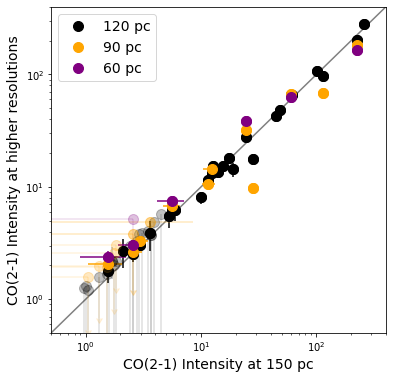

In [31]:

x, y = np.linspace(0.5,400,1000),  np.linspace(0.5,400,1000)
fig = plt.figure(figsize=(6,6))  
plt.loglog(x,y,ls="-",color="grey", zorder=0)
plt.xlim(0.5,400)
plt.ylim(0.5,400)
print(plotStuff120[0][4], plotStuff120[0][5])

plt.loglog(plotStuff120[0][0], plotStuff120[0][1], color="black", marker="o",ls="",ms=10, label="120 pc", alpha = 1, zorder=1)
plt.errorbar(plotStuff120[0][0], plotStuff120[0][1], plotStuff120[0][3], plotStuff120[0][4], color="black", marker="o",ls="",ms=10, alpha = 1, zorder=1)
plt.loglog(plotStuff120[1][0], plotStuff120[1][1], color="black", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
plt.errorbar(plotStuff120[1][0], plotStuff120[1][1], plotStuff120[1][3], plotStuff120[1][4],xuplims=True, color="black", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
plt.loglog(plotStuff120[2][0], plotStuff120[2][1], color="black", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
plt.errorbar(plotStuff120[2][0], plotStuff120[2][1], plotStuff120[2][3], plotStuff120[2][4],uplims=True, color="black", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
plt.loglog(plotStuff120[3][0], plotStuff120[3][1], color="black", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)
plt.errorbar(plotStuff120[3][0], plotStuff120[3][1], plotStuff120[3][3], plotStuff120[3][4],xuplims=True,uplims=True, color="black", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)


plt.loglog(plotStuff90[0][0], plotStuff90[0][1], color="orange", marker="o",ls="",ms=10, label="90 pc", alpha = 1, zorder=1)
plt.errorbar(plotStuff90[0][0], plotStuff90[0][1], plotStuff90[0][2], plotStuff90[0][3], color="orange", marker="o",ls="",ms=10, alpha = 1, zorder=1)
plt.loglog(plotStuff90[1][0], plotStuff90[1][1], color="orange", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
plt.errorbar(plotStuff90[1][0], plotStuff90[1][1], plotStuff90[1][2], plotStuff90[1][3],xuplims=True, color="orange", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
plt.loglog(plotStuff90[2][0], plotStuff90[2][1], color="orange", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
plt.errorbar(plotStuff90[2][0], plotStuff90[2][1], plotStuff90[2][2], plotStuff90[2][3],uplims=True, color="orange", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
plt.loglog(plotStuff90[3][0], plotStuff90[3][1], color="orange", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)
plt.errorbar(plotStuff90[3][0], plotStuff90[3][1], plotStuff90[3][2], plotStuff90[3][3],xuplims=True,uplims=True, color="orange", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)


plt.loglog(plotStuff60[0][0], plotStuff60[0][1], color="purple", marker="o",ls="",ms=10, label="60 pc", alpha = 1, zorder=1)
plt.errorbar(plotStuff60[0][0], plotStuff60[0][1], plotStuff60[0][2], plotStuff60[0][3], color="purple", marker="o",ls="",ms=10, alpha = 1, zorder=1)
plt.loglog(plotStuff60[1][0], plotStuff60[1][1], color="purple", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
plt.errorbar(plotStuff60[1][0], plotStuff60[1][1], plotStuff60[1][2], plotStuff60[1][3],xuplims=True, color="purple", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
plt.loglog(plotStuff60[2][0], plotStuff60[2][1], color="purple", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
plt.errorbar(plotStuff60[2][0], plotStuff60[2][1], plotStuff60[2][2], plotStuff60[2][3],uplims=True, color="purple", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
plt.loglog(plotStuff60[3][0], plotStuff60[3][1], color="purple", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)
plt.errorbar(plotStuff60[3][0], plotStuff60[3][1], plotStuff60[3][2], plotStuff60[3][3],xuplims=True,uplims=True, color="purple", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)

plt.legend(loc="best", fontsize = 14)
plt.ylabel("CO(2-1) Intensity at higher resolutions", fontsize=14)
plt.xlabel("CO(2-1) Intensity at 150 pc", fontsize=14)
plt.show()
fig.savefig("../Figures/ResolutionIntensityComparison.png")
plt.close()

In [22]:
# Need to incorporate this into the plotting for both


In [32]:
x60v150, y60v150, ex60v150, ey60v150 = [],[],[],[]
x90v150, y90v150, ex90v150, ey90v150 = [],[],[],[]
x120v150, y120v150, ex120v150, ey120v150 = [],[],[],[]

#get intensity v intensity arrays
for i in range(len(SNname)):
    if (np.isfinite(pc60Int[i])and np.isfinite(pc150Int[i])):
        y60v150.append(pc60Int[i])
        x60v150.append(pc150Int[i])
        ey60v150.append(pc60Err[i])
        ex60v150.append(pc150Err[i])
    if (np.isfinite(pc90Int[i])and np.isfinite(pc150Int[i])):
        y90v150.append(pc90Int[i])
        x90v150.append(pc150Int[i])
        ey90v150.append(pc90Err[i])
        ex90v150.append(pc150Err[i])
    if (np.isfinite(pc120Int[i])and np.isfinite(pc150Int[i])):
        y120v150.append(pc120Int[i])
        x120v150.append(pc150Int[i])
        ey120v150.append(pc120Err[i])
        ex120v150.append(pc150Err[i])
    
#next assign upper limit arrows and error bars
def checkULs(xvarray, yvarray, exarray, eyarray):

    detx = np.asarray(xvarray) < (3 * np.asarray(exarray))
    dety = np.asarray(yvarray) < (3 * np.asarray(eyarray))
    newexarray, neweyarray = exarray.copy(),eyarray.copy()
    for i in range(len(detx)):
        if detx[i] == True:
            xvarray[i] = 3 * exarray[i]
            newexarray[i] =  3 * exarray[i]
        if dety[i] == True:
            yvarray[i] = 3 * eyarray[i]
            neweyarray[i] = 3 * eyarray[i]
    
    return(detx,dety, xvarray, yvarray, newexarray, neweyarray)

Det60x,Det60y,x60v150Flip, y60v150Flip, x60v150Ferr, y60v150Ferr  = checkULs(x60v150, y60v150, ex60v150, ey60v150)
Det90x,Det90y,x90v150Flip, y90v150Flip, x90v150Ferr, y90v150Ferr   = checkULs(x90v150, y90v150, ex90v150, ey90v150)
Det120x,Det120y,x120v150Flip, y120v150Flip, x120v150Ferr, y120v150Ferr   = checkULs(x120v150, y120v150, ex120v150, ey120v150)

# logx60v150Ferr, logy60v150Ferr = logErrors(x60v150Flip, x60v150Ferr), logErrors(y60v150Flip, y60v150Ferr)

# if x is upper limit, det60x is true, etc.
# x60v150, y60v150 x is 150 value and y is 60 value, etc
# xerr=ex120v150, yerr=ey120v150

def reorder(detArrx, detArry, xArr, yArr, xerr, yerr):
    
    xD, yD, xDe, yDe, xULD, yULD, xULDe, yULDe, xDUL, yDUL, xDULe, yDULe,xULS, yULS, xULSe, yULSe = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
    
    for i in range(len(detArrx)):
        
        if detArrx[i] == False and detArry[i] == False:
            xD.append(xArr[i])
            yD.append(float(yArr[i]/xArr[i]))
            xDe.append(xerr[i])
            yDe.append(np.sqrt(float(yerr[i]/yArr[i])**2+ float(xerr[i]/xArr[i])**2))
        elif detArrx[i] == True and detArry[i] == False:
            xULD.append(xArr[i]) 
            yULD.append(float(yArr[i]/xArr[i]))
            xULDe.append(xerr[i])
            yULDe.append(np.sqrt(float(yerr[i]/yArr[i])**2+ float(xerr[i]/xArr[i])**2))
        elif detArrx[i] == False and detArry[i] == True:
            xDUL.append(xArr[i]) 
            yDUL.append(float(yArr[i]/xArr[i]))
            xDULe.append(xerr[i])
            yDULe.append(np.sqrt(float(yerr[i]/yArr[i])**2+ float(xerr[i]/xArr[i])**2))
        elif detArrx[i] == True and detArry[i] == True:
            xULS.append(xArr[i]) 
            yULS.append(float(yArr[i]/xArr[i]))
            xULSe.append(xerr[i])
            yULSe.append(np.sqrt(float(yerr[i]/yArr[i])**2+ float(xerr[i]/xArr[i])**2))
        else: 
            print("something fucked up.")
    
    plotStuff = [(xD, yD, xDe, yDe), (xULD, yULD, xULDe, yULDe), (xDUL, yDUL, xDULe, yDULe),(xULS, yULS, xULSe, yULSe)]
    
    return(plotStuff)

plotStuff60r  = reorder(Det60x, Det60y, x60v150Flip, y60v150Flip, x60v150Ferr, y60v150Ferr)
plotStuff90r  = reorder(Det90x, Det90y, x90v150Flip, y90v150Flip, x90v150Ferr, y90v150Ferr)
plotStuff120r = reorder(Det120x, Det120y, x120v150Flip, y120v150Flip, x120v150Ferr, y120v150Ferr)


[-0.04241158  0.17374245 -0.01051143  0.08238429  0.14644121  0.05672074
 -0.52984775 -0.07931255 -0.30871853 -0.10925131 -0.05917312  0.04672151
 -0.03611131 -0.1554458  -0.26597617 -0.12956028 -0.02249414 -0.01168996
  0.0315721   0.22028638  0.08711298 -0.22193835 -0.49959483 -0.4881701
 -0.58438268 -0.44964156 -0.50380785 -0.228852  ]


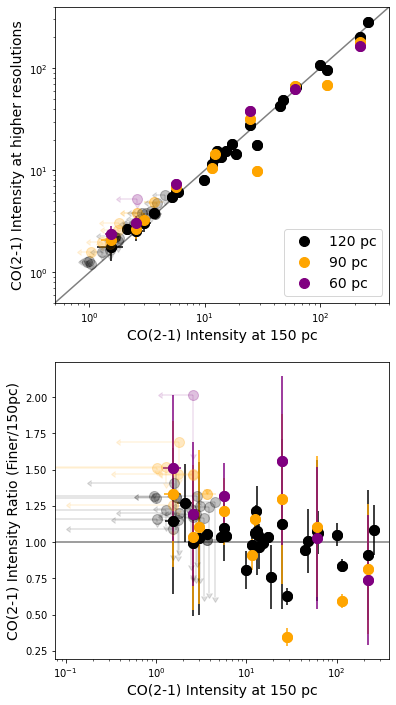

In [34]:

fig,ax= plt.subplots(2, 1)   
fig.set_figheight(12)
fig.set_figwidth(6)
x, y = np.linspace(0.5,400,1000),  np.linspace(0.5,400,1000)
ax[0].loglog(x,y,ls="-",color="grey", zorder=0)
ax[0].set_xlim(0.5,400)
ax[0].set_ylim(0.5,400)
print(np.log10(plotStuff120[0][2]))
ax[0].loglog(plotStuff120[0][0], plotStuff120[0][1], color="black", marker="o",ls="",ms=10, label="120 pc", alpha = 1, zorder=1)
ax[0].errorbar(plotStuff120[0][0], plotStuff120[0][1], np.log10(plotStuff120[0][2]), np.log10(plotStuff120[0][3]), color="black", marker="o",ls="",ms=10, alpha = 1, zorder=1)
ax[0].loglog(plotStuff120[1][0], plotStuff120[1][1], color="black", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[0].errorbar(plotStuff120[1][0], plotStuff120[1][1], np.log10(plotStuff120[1][2]), np.log10(plotStuff120[1][3]),xuplims=True, color="black", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[0].loglog(plotStuff120[2][0], plotStuff120[2][1], color="black", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[0].errorbar(plotStuff120[2][0], plotStuff120[2][1], np.log10(plotStuff120[2][2]), np.log10(plotStuff120[2][3]),uplims=True, color="black", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[0].loglog(plotStuff120[3][0], plotStuff120[3][1], color="black", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)
ax[0].errorbar(plotStuff120[3][0], plotStuff120[3][1], np.log10(plotStuff120[3][2]), np.log10(plotStuff120[3][3]),xuplims=True,uplims=True, color="black", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)

ax[0].loglog(plotStuff90[0][0], plotStuff90[0][1], color="orange", marker="o",ls="",ms=10, label="90 pc", alpha = 1, zorder=1)
ax[0].errorbar(plotStuff90[0][0], plotStuff90[0][1], np.log10(plotStuff90[0][2]), np.log10(plotStuff90[0][3]), color="orange", marker="o",ls="",ms=10, alpha = 1, zorder=1)
ax[0].loglog(plotStuff90[1][0], plotStuff90[1][1], color="orange", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[0].errorbar(plotStuff90[1][0], plotStuff90[1][1], np.log10(plotStuff90[1][2]), np.log10(plotStuff90[1][3]),xuplims=True, color="orange", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[0].loglog(plotStuff90[2][0], plotStuff90[2][1], color="orange", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[0].errorbar(plotStuff90[2][0], plotStuff90[2][1], np.log10(plotStuff90[2][2]), np.log10(plotStuff90[2][3]),uplims=True, color="orange", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[0].loglog(plotStuff90[3][0], plotStuff90[3][1], color="orange", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)
ax[0].errorbar(plotStuff90[3][0], plotStuff90[3][1], np.log10(plotStuff90[3][2]), np.log10(plotStuff90[3][3]),xuplims=True,uplims=True, color="orange", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)

ax[0].loglog(plotStuff60[0][0], plotStuff60[0][1], color="purple", marker="o",ls="",ms=10, label="60 pc", alpha = 1, zorder=1)
ax[0].errorbar(plotStuff60[0][0], plotStuff60[0][1], np.log10(plotStuff60[0][2]), np.log10(plotStuff60[0][3]), color="purple", marker="o",ls="",ms=10, alpha = 1, zorder=1)
ax[0].loglog(plotStuff60[1][0], plotStuff60[1][1], color="purple", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[0].errorbar(plotStuff60[1][0], plotStuff60[1][1], np.log10(plotStuff60[1][2]), np.log10(plotStuff60[1][3]),xuplims=True, color="purple", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[0].loglog(plotStuff60[2][0], plotStuff60[2][1], color="purple", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[0].errorbar(plotStuff60[2][0], plotStuff60[2][1], np.log10(plotStuff60[2][2]), np.log10(plotStuff60[2][3]),uplims=True, color="purple", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[0].loglog(plotStuff60[3][0], plotStuff60[3][1], color="purple", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)
ax[0].errorbar(plotStuff60[3][0], plotStuff60[3][1], np.log10(plotStuff60[3][2]), np.log10(plotStuff60[3][3]),xuplims=True,uplims=True, color="purple", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)

ax[0].legend(loc="lower right", fontsize = 14)
ax[0].set_ylabel("CO(2-1) Intensity at higher resolutions", fontsize=14)
ax[0].set_xlabel("CO(2-1) Intensity at 150 pc", fontsize=14)

ax[1].axhline(y=1.0, color='grey', linestyle='-', zorder=0)
ax[1].semilogx(plotStuff120r[0][0], plotStuff120r[0][1], color="black", marker="o",ls="",ms=10, label="120 pc", alpha = 1, zorder=1)
ax[1].errorbar(plotStuff120r[0][0], plotStuff120r[0][1], np.log10(plotStuff120r[0][2]), plotStuff120r[0][3], color="black", marker="o",ls="",ms=10, alpha = 1, zorder=1)
ax[1].semilogx(plotStuff120r[1][0], plotStuff120r[1][1], color="black", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[1].errorbar(plotStuff120r[1][0], plotStuff120r[1][1], np.log10(plotStuff120r[1][2]), plotStuff120r[1][3],xuplims=True, color="black", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[1].semilogx(plotStuff120r[2][0], plotStuff120r[2][1], color="black", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[1].errorbar(plotStuff120r[2][0], plotStuff120r[2][1], np.log10(plotStuff120r[2][2]), plotStuff120r[2][3],uplims=True, color="black", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[1].semilogx(plotStuff120r[3][0], plotStuff120r[3][1], color="black", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)
ax[1].errorbar(plotStuff120r[3][0], plotStuff120r[3][1], np.log10(plotStuff120r[3][2]), plotStuff120r[3][3],xuplims=True,uplims=True, color="black", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)

ax[1].semilogx(plotStuff90r[0][0], plotStuff90r[0][1], color="orange", marker="o",ls="",ms=10, label="90 pc", alpha = 1, zorder=1)
ax[1].errorbar(plotStuff90r[0][0], plotStuff90r[0][1], np.log10(plotStuff90r[0][2]), plotStuff90r[0][3], color="orange", marker="o",ls="",ms=10, alpha = 1, zorder=1)
ax[1].semilogx(plotStuff90r[1][0], plotStuff90r[1][1], color="orange", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[1].errorbar(plotStuff90r[1][0], plotStuff90r[1][1], np.log10(plotStuff90r[1][2]), plotStuff90r[1][3],xuplims=True, color="orange", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[1].semilogx(plotStuff90r[2][0], plotStuff90r[2][1], color="orange", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[1].errorbar(plotStuff90r[2][0], plotStuff90r[2][1], np.log10(plotStuff90r[2][2]), plotStuff90r[2][3],uplims=True, color="orange", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[1].semilogx(plotStuff90r[3][0], plotStuff90r[3][1], color="orange", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)
ax[1].errorbar(plotStuff90r[3][0], plotStuff90r[3][1], np.log10(plotStuff90r[3][2]), plotStuff90r[3][3],xuplims=True,uplims=True, color="orange", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)

ax[1].semilogx(plotStuff60r[0][0], plotStuff60r[0][1], color="purple", marker="o",ls="",ms=10, label="60 pc", alpha = 1, zorder=1)
ax[1].errorbar(plotStuff60r[0][0], plotStuff60r[0][1], np.log10(plotStuff60r[0][2]), plotStuff60r[0][3], color="purple", marker="o",ls="",ms=10, alpha = 1, zorder=1)
ax[1].semilogx(plotStuff60r[1][0], plotStuff60r[1][1], color="purple", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[1].errorbar(plotStuff60r[1][0], plotStuff60r[1][1], np.log10(plotStuff60r[1][2]), plotStuff60r[1][3],xuplims=True, color="purple", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[1].semilogx(plotStuff60r[2][0], plotStuff60r[2][1], color="purple", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[1].errorbar(plotStuff60r[2][0], plotStuff60r[2][1], np.log10(plotStuff60r[2][2]), plotStuff60r[2][3],uplims=True, color="purple", marker="o",ls="",ms=10, alpha = 0.25, zorder=1)
ax[1].semilogx(plotStuff60r[3][0], plotStuff60r[3][1], color="purple", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)
ax[1].errorbar(plotStuff60r[3][0], plotStuff60r[3][1], np.log10(plotStuff60r[3][2]), plotStuff60r[3][3],xuplims=True,uplims=True, color="purple", marker="o",ls="",ms=10, alpha = 0.13, zorder=1)

#ax[1].legend(loc="lower left", fontsize = 14)
ax[1].set_ylabel("CO(2-1) Intensity Ratio (Finer/150pc)", fontsize=14)
ax[1].set_xlabel("CO(2-1) Intensity at 150 pc", fontsize=14)
plt.show()
fig.savefig("../Figures/ResolutionIntensityComparisonRatio.png")
plt.close()